In [21]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text

from PIL import Image
import urllib

In [22]:
df = pd.read_csv('/Users/andylyford/Desktop/PROJECTS/Football/data/southampton_results_Hasenhuttl_concise.csv')
df.head()

,Date,Result,GF,GA,Opponent,xG,xGA,Poss,Notes
0,2018-08-12,D,0,0,Burnley,1.1,1.5,49,NaN
1,2018-08-18,L,1,2,Everton,1.6,1.8,44,NaN
2,2018-08-25,L,1,2,Leicester City,0.7,0.5,51,NaN
3,2018-09-01,W,2,0,Crystal Palace,2.5,1.9,50,NaN
4,2018-09-17,D,2,2,Brighton,1.7,1.7,51,NaN


In [49]:
Y_for = df['xG']
Y_ag = df['xGA']
X = pd.Series(range(len(Y_for)))

# Compute the rolling average (min_periods is used for the partial average)
# Here we're using a 10 game rolling average
Y_for = Y_for.rolling(window = 10, min_periods = 0).mean()
Y_ag = Y_ag.rolling(window = 10, min_periods = 0).mean()


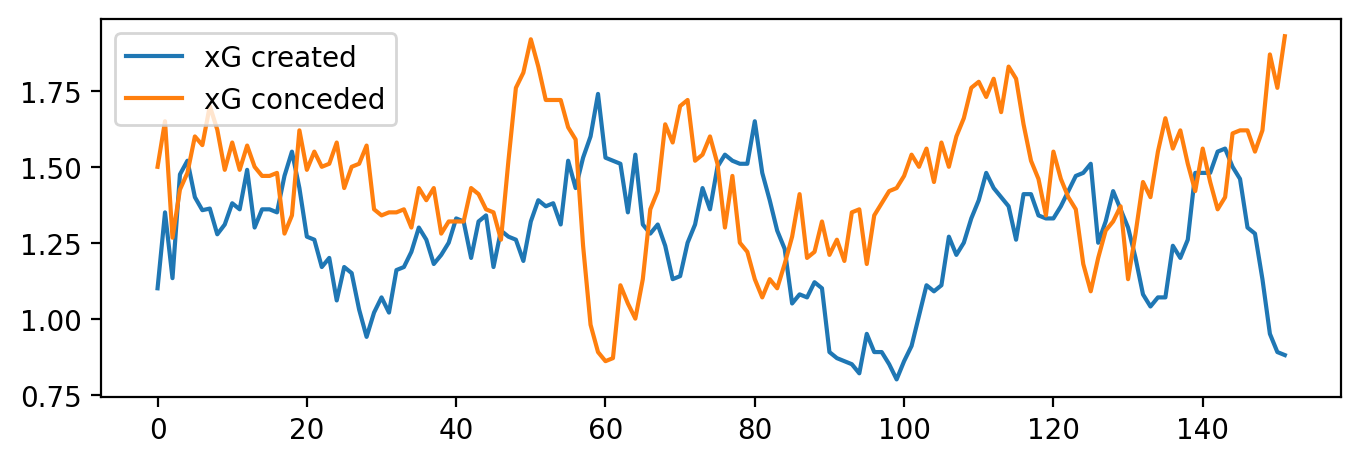

In [50]:
fig = plt.figure(figsize=(8, 2.5), dpi = 200)
ax = plt.subplot(111)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

ax.legend()


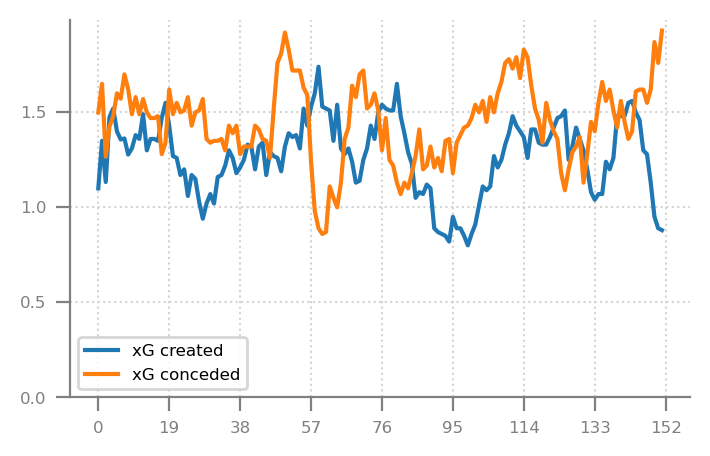

In [51]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey"
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

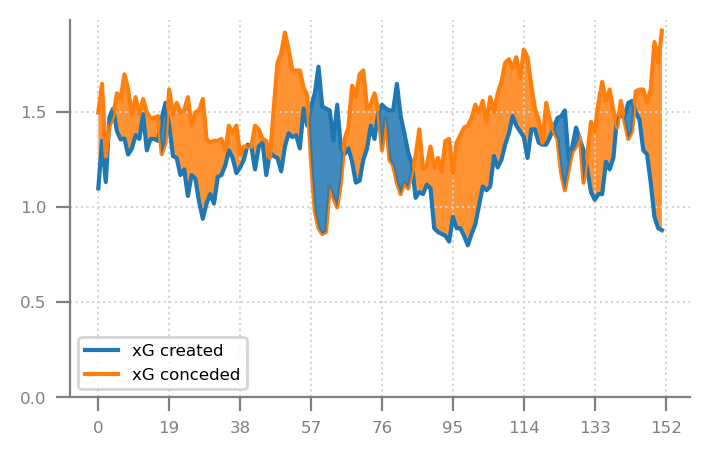

In [52]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

# Fill between
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for > Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag >= Y_for, 
    interpolate = True,
    alpha = 0.85
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(19))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

(-0.5, 191.5, 191.5, -0.5)

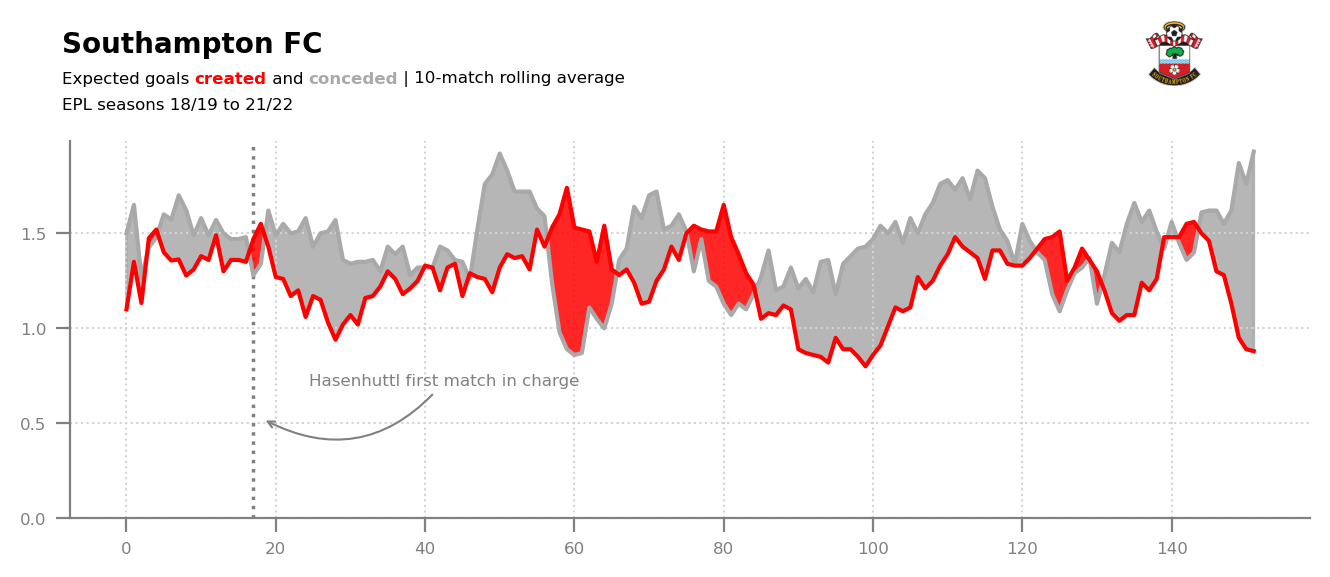

In [57]:
fig = plt.figure(figsize=(8, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color='red', zorder = 5)
line_2 = ax.plot(X, Y_ag, color='darkgrey', zorder = 4)

ax.set_ylim(0)
# Add a line to mark the division between seasons
ax.plot(
    [17,17], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (17, .55),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "Hasenhuttl first match in charge",
    size = 6,
    color = "grey",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # Arrow to connect annotation
)

# Fill between
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for >= Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag > Y_for, 
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
#ax.set_xticks(X%38)
#ax.xaxis.set_major_locator(ticker.MultipleLocator())
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Southampton FC",
    color = "black",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 10-match rolling average\nEPL seasons 18/19 to 21/22",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}8466.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")